In [1]:
#Split Train and Test Split

import pandas as pd
import numpy as np
# scale data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error,accuracy_score,mean_squared_error
# import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import re
import xgboost as xgb

import warnings

warnings.filterwarnings("ignore") 

# Read cleaned DF and split x and y
featurefilterdf=pd.read_csv("../data/listings_clean.csv",sep="\t")
featurefilterdf=featurefilterdf.loc[:, ~featurefilterdf.columns.str.contains('^Unnamed')]
print(featurefilterdf.columns,  "   Shape:",featurefilterdf.shape)


C:\Users\vanitha\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'cancellation_policy', 'guests_included', 'bedrooms', 'risk_rating'],
      dtype='object')    Shape: (7104, 15)


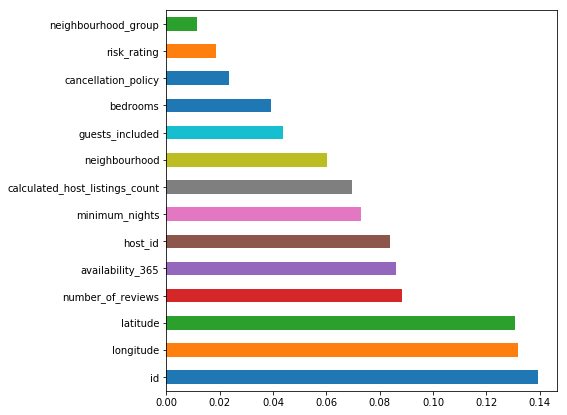

In [2]:
# Split into train and test
x=featurefilterdf[featurefilterdf.columns.difference(['price'])]
#print(x.columns)
y = featurefilterdf['price']

from sklearn.ensemble import ExtraTreesClassifier
le = preprocessing.LabelEncoder()
feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(x,le.fit_transform(y))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [3]:
def Getscore(model,modelname,x_train,y_train,x_test,y_test ):
    model.fit(x_train,y_train)
    print("**** Model ",modelname,"*********************")
    # Predict the test data
    y_pred=model.predict(x_test)

    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {round(RMSE, 4)}")
    r2 = r2_score(y_test, y_pred) 
    print(f"r2: {round(r2, 4)}")
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel(modelname+'Measured')
    ax.set_ylabel('Predicted')
    plt.show()
    return y_pred

**** Model  LinearRegression *********************
RMSE: 72.7493
r2: 0.3341


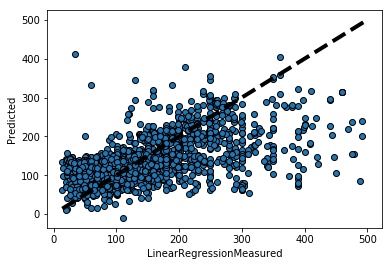

In [4]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5555)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

#Prepare a Linear Regression Model  by training

reg=LinearRegression()
regpred_res=Getscore(reg,"LinearRegression",x_train,y_train,x_test,y_test )

**** Model  RandomForestRegressor *********************
RMSE: 51.1568
r2: 0.6707


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


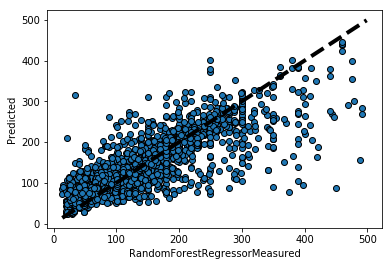

In [5]:
#Prepare a RF Model  by training

rf=RandomForestRegressor(random_state=0, n_estimators=100, verbose=1)
rfpred_res=Getscore(rf,"RandomForestRegressor",x_train,y_train,x_test,y_test )

**** Model  etrees *********************
RMSE: 61.5105
r2: 0.5239


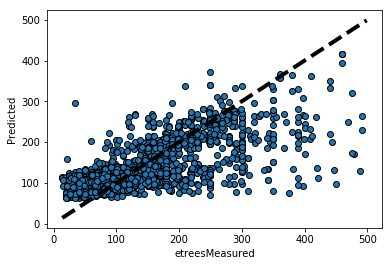

array([240.74455187,  92.11545107,  85.78182625, ..., 103.67389391,
       231.47790336, 128.11590273])

In [6]:
# Feature Selection
from sklearn.ensemble import ExtraTreesRegressor 
etrees = ExtraTreesRegressor(bootstrap=False,max_depth=8,max_features=10,n_estimators=100,n_jobs=-1,random_state=100) 
Getscore(etrees,"etrees",x_train,y_train,x_test,y_test )

**** Model  xgbooster *********************
RMSE: 48.3979
r2: 0.7053


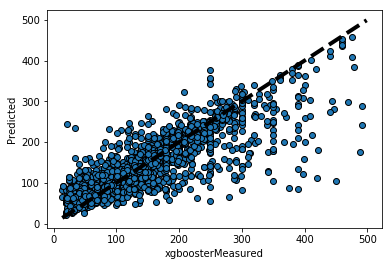

In [7]:
#Training an XGBoost Regressor 
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=10, n_estimators=200)
xgbpred_res=Getscore(booster,"xgbooster",x_train,y_train,x_test,y_test )

In [8]:
## Pred based on input feature
#print(x[:1])
testDFori=pd.DataFrame()
#testDFori=featurefilterdf.columns
#featurefilterdf.columns
testDFori = pd.DataFrame(
	[[365,1,0,1,1,266763,49091,0,0,2,4,3,0,0]],
    columns=['availability_365','bedrooms','calculated_host_listings_count', 'cancellation_policy', 'guests_included', 'host_id','id','latitude','longitude','minimum_nights','neighbourhood','neighbourhood_group','number_of_reviews','risk_rating'])

In [9]:
## predict the value for the given input
#testDF=Feature_conversion(testDFori)#print(x_test[0])#print("---------------")#print(testDFori.values)
testpred_prob =  booster.predict(testDFori.values)
print(testpred_prob)


[165.64777]


In [10]:
#df.loc[df['Item'].str.contains('Phone'), ['RelatedItem',  'CountinInventory']]
def getName(mappeddf, testDFori,listcolumname):
    oplist=[]
    for columname in listcolumname:
        newcolname="Name_"+columname
        print(newcolname)
        name= mappeddf.loc[mappeddf[columname]==testDFori[columname][0], [newcolname]]
        print(name.values[0]) 
        oplist.append((name.values[0])[0])
    return oplist
mappeddf=pd.read_csv("../data/name_map.csv",sep="\t")

#Nameneighood=mappeddf.loc[mappeddf['neighbourhood']==testDFori['neighbourhood'][0], ['Nameneighbourhood']])
#Regioname=mappeddf.loc[mappeddf['neighbourhood_group']==testDFori['neighbourhood_group'][0], ['Nameneighbourhood_group']])
oplist =getName(mappeddf,testDFori,['neighbourhood','neighbourhood_group','risk_rating'])
#Nameroom_type
print(oplist ,"Expected Price",testpred_prob)

Name_neighbourhood
['Bukit Merah']
Name_neighbourhood_group
['North-East Region']
Name_risk_rating
['High risk']
['Bukit Merah', 'North-East Region', 'High risk'] Expected Price [165.64777]


In [ ]:
featurefilterdf.columns

In [ ]:
#Model Selection Criteria-A model with a larger R-squared value means that the independent variables explain a larger percentage of the variation in the independent variable.

from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=5)
scores 

In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(etrees, featurefilterdf, y, cv=6)
print("Etreescore",scores)
scores = cross_val_score(booster, featurefilterdf, y, cv=6)
print(scores)

In [ ]:
# reducing variable 'number_of_reviews', 'minimum_nights','guests_included' impact R2 accuracy from 70% to 67%
newx=featurefilterdf[featurefilterdf.columns.difference(['price','number_of_reviews', 'minimum_nights','guests_included'])]
newy=  featurefilterdf['price']


x_train,x_test,y_train,y_test=train_test_split(newx,newy,test_size=0.3,random_state=5555)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

#Prepare a Linear Regression Model  by training

 
newboost_pred_res=Getscore(booster,"LinearRegression",x_train,y_train,x_test,y_test )

In [ ]:
# reducing variable 'number_of_reviews', 'minimum_nights' impact R2 accuracy from 70% to 68%
newx=featurefilterdf[featurefilterdf.columns.difference(['price','number_of_reviews', 'minimum_nights'])]
newy=  featurefilterdf['price']


x_train,x_test,y_train,y_test=train_test_split(newx,newy,test_size=0.3,random_state=5555)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

#Prepare a Linear Regression Model  by training

 
newboost_pred_res=Getscore(booster,"LinearRegression",x_train,y_train,x_test,y_test )